In [1]:
import pandas as pd
import numpy as np
import glob
from typing import List
from matplotlib import pyplot as plt
from utils.clean_data import load_csv_files, clean_train_data, clean_items_data

## Loading data

In [2]:
treino_dir = "./data/treino/"
itens_dir = "./data/itens/"

# Carregar dados
treino_files = glob.glob(f"{treino_dir}/*.csv")
itens_files = glob.glob(f"{itens_dir}/*.csv")

# Carregar os dados
df_treino_raw = load_csv_files(treino_files)
df_itens_raw = load_csv_files(itens_files)

## Analise Inicial - Dados de Treino

In [3]:
df_treino = df_treino_raw.copy()

In [4]:
df_treino.head()

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,timestampHistory_new
0,fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27...,Non-Logged,2,"80aa7bb2-adce-4a55-9711-912c407927a1, d9e5f15d...","1657908085200, 1659634203762","0, 0","71998, 115232","81.58, 73.36","1, 1","1657908085200, 1659634203762"
1,17f1083e6079b0f28f7820a6803583d1c1b405c0718b11...,Non-Logged,2,"19ba89fc-1e06-4c5d-9c57-4a3088dc0511, e273dba4...","1657111508570, 1657481309920","68, 12","131495, 43733","51.74, 35.49","1, 1","1657111508570, 1657481309920"
2,528a8d7a2af73101da8d6709c1ec875b449a5a58749a99...,Non-Logged,2,"59a61a8a-cc52-453f-b1cd-2bd019e9d574, a0562805...","1657823890328, 1660141444328","55, 9","159042, 10336","62.19, 48.28","1, 1","1657823890328, 1660141444328"
3,2dd18b58a634a4e77181a202cf152df6169dfb3e4230ef...,Non-Logged,2,"233f8238-2ce0-470f-a9d5-0e0ac530382a, 037155f4...","1656963373076, 1657091888917","0, 0","193579, 20519","31.03, 31.9","1, 1","1656963373076, 1657091888917"
4,97e1439d485b0630e12818d3df84ff67d08475ef6ebeb0...,Logged,2,"385044ad-3876-4188-83fa-f560435c1a9c, 2f754502...","1657618607633, 1659536839832","57, 38","220000, 130000","52.65, 53.37","1, 1","1657618607633, 1659536839832"


In [4]:
# A columa timestasmpHistory_new pode ser removida já que é igual a timestampHistory
(df_treino["timestampHistory"] == df_treino["timestampHistory_new"]).value_counts()

True    577942
Name: count, dtype: int64

In [40]:
df_treino = df_treino.drop(columns=["timestampHistory_new"])

In [35]:
# checando se ha userId duplicados
(
    df_treino.groupby("userId")
    .size()
    .reset_index(name="count")
    .query("count > 1")
)

# podemos perceber que eh uma linha por usuario

,userId,count


In [36]:
# E para cada usuario existem quantidades diferentes de noticias consumidas
df_treino.groupby("historySize").head(1).sort_values("historySize").head(5)

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory
169,767c0162d43e7b3efafaa89360473992e56d830fd5cb26...,Non-Logged,1,5165b7b8-3988-486d-82ca-e1fff3c1b500,1659749500890,10,20148,69.73,2
0,fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27...,Non-Logged,2,"80aa7bb2-adce-4a55-9711-912c407927a1, d9e5f15d...","1657908085200, 1659634203762","0, 0","71998, 115232","81.58, 73.36","1, 1"
30,9ad920cb19f5142def60e856579610af12abaabfe08813...,Non-Logged,3,"73151e02-dd2a-4509-968e-b9c16ec1c5db, f2b3cd5d...","1658851324730, 1658851359552, 1658851419499","2, 16, 17","10000, 53232, 110000","19.5, 56.63, 83.96","1, 1, 1"
78,7c2a0de4067411bcd923e146aeb7b69c41a94233a92eea...,Non-Logged,4,"04a6688f-bb07-4dfa-a1bb-432bf540f841, 39155663...","1656678533987, 1656939283245, 1656947131035, 1...","0, 0, 0, 0","10951, 10000, 7473, 64073","12.43, 17.66, 56.48, 51.99","1, 1, 1, 1"
115,2ee29c3b488675d9cb0bf7ec3628b3c2965bc532180334...,Non-Logged,5,"c44af7c6-88e9-4ce2-81d6-7b8adc4e085b, 0906fe9c...","1659150541589, 1659454851970, 1659454935119, 1...","13, 11, 10, 6, 11","47348, 39297, 42652, 21185, 63258","33.36, 36.28, 30.04, 33.0, 36.22","1, 1, 1, 1, 1"


In [26]:
df_treino.head()

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory
0,fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27...,Non-Logged,2,"80aa7bb2-adce-4a55-9711-912c407927a1, d9e5f15d...","1657908085200, 1659634203762","0, 0","71998, 115232","81.58, 73.36","1, 1"
1,17f1083e6079b0f28f7820a6803583d1c1b405c0718b11...,Non-Logged,2,"19ba89fc-1e06-4c5d-9c57-4a3088dc0511, e273dba4...","1657111508570, 1657481309920","68, 12","131495, 43733","51.74, 35.49","1, 1"
2,528a8d7a2af73101da8d6709c1ec875b449a5a58749a99...,Non-Logged,2,"59a61a8a-cc52-453f-b1cd-2bd019e9d574, a0562805...","1657823890328, 1660141444328","55, 9","159042, 10336","62.19, 48.28","1, 1"
3,2dd18b58a634a4e77181a202cf152df6169dfb3e4230ef...,Non-Logged,2,"233f8238-2ce0-470f-a9d5-0e0ac530382a, 037155f4...","1656963373076, 1657091888917","0, 0","193579, 20519","31.03, 31.9","1, 1"
4,97e1439d485b0630e12818d3df84ff67d08475ef6ebeb0...,Logged,2,"385044ad-3876-4188-83fa-f560435c1a9c, 2f754502...","1657618607633, 1659536839832","57, 38","220000, 130000","52.65, 53.37","1, 1"


In [42]:
target_user_id = df_treino["userId"].iloc[0]
target_user_id

'fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27288434101e7252ef57'

In [51]:
df_treino.query("userId == @target_user_id")

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,timestampHistory_new
0,fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27...,Non-Logged,2,"80aa7bb2-adce-4a55-9711-912c407927a1, d9e5f15d...","1657908085200, 1659634203762","0, 0","71998, 115232","81.58, 73.36","1, 1","1657908085200, 1659634203762"


In [50]:
df_exploded = clean_train_data(df_treino)

In [52]:
df_exploded.query("userId == @target_user_id")

,userId,userType,historySize,historyId,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory
0,fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27...,Non-Logged,2,80aa7bb2-adce-4a55-9711-912c407927a1,2022-07-15 18:01:25.200,0,71998,81.58,1
1,fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27...,Non-Logged,2,d9e5f15d-b441-4d8b-bee4-462b106d3916,2022-08-04 17:30:03.762,0,115232,73.36,1


In [53]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123951 entries, 0 to 8123950
Data columns (total 9 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   userId                   object        
 1   userType                 object        
 2   historySize              int64         
 3   historyId                object        
 4   timestampHistory         datetime64[ns]
 5   numberOfClicksHistory    int64         
 6   timeOnPageHistory        int64         
 7   scrollPercentageHistory  float64       
 8   pageVisitsCountHistory   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 557.8+ MB


## Analise Inicial - Itens

In [ ]:
df_itens = df_itens_raw.copy()

In [6]:
df_itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255603 entries, 0 to 255602
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   page      255603 non-null  object
 1   url       255603 non-null  object
 2   issued    255603 non-null  object
 3   modified  255603 non-null  object
 4   title     255603 non-null  object
 5   body      255603 non-null  object
 6   caption   255603 non-null  object
dtypes: object(7)
memory usage: 13.7+ MB


In [56]:
# verificando paginas duplicadas
(
    df_itens.groupby("page")
    .size()
    .reset_index(name="count")
    .query("count > 1")
)

,page,count


In [57]:
df_itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255603 entries, 0 to 255602
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   page      255603 non-null  object
 1   url       255603 non-null  object
 2   issued    255603 non-null  object
 3   modified  255603 non-null  object
 4   title     255603 non-null  object
 5   body      255603 non-null  object
 6   caption   255603 non-null  object
dtypes: object(7)
memory usage: 13.7+ MB


## Analise dataset final

In [5]:
df_itens = clean_items_data(df_itens_raw)
df_treino = clean_train_data(df_treino_raw)

In [6]:
df_treino.head()

,userId,userType,historySize,historyId,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory
0,fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27...,Non-Logged,2,80aa7bb2-adce-4a55-9711-912c407927a1,2022-07-15 18:01:25.200,0,71998,81.58,1
1,fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27...,Non-Logged,2,d9e5f15d-b441-4d8b-bee4-462b106d3916,2022-08-04 17:30:03.762,0,115232,73.36,1
2,17f1083e6079b0f28f7820a6803583d1c1b405c0718b11...,Non-Logged,2,19ba89fc-1e06-4c5d-9c57-4a3088dc0511,2022-07-06 12:45:08.570,68,131495,51.74,1
3,17f1083e6079b0f28f7820a6803583d1c1b405c0718b11...,Non-Logged,2,e273dba4-136c-45fb-bdd6-0cc57b13aaf0,2022-07-10 19:28:29.920,12,43733,35.49,1
4,528a8d7a2af73101da8d6709c1ec875b449a5a58749a99...,Non-Logged,2,59a61a8a-cc52-453f-b1cd-2bd019e9d574,2022-07-14 18:38:10.328,55,159042,62.19,1


In [7]:
df_itens.head()

,historyId,title,body,caption
0,7371a9b5-5824-4c57-8704-00a74feebe79,Corpo de motorista da Uber é encontrado em can...,Corpo de motorista de aplicativo desaparecido ...,"Segundo a polícia, Antônio Vitor foi solicitad..."
1,7a5ea08f-4583-49e2-ba52-a71999443f7b,Detento recapturado após fuga por túnel volta ...,Detento disse que passou nome falso ao dar ent...,Ele tinha registro em presídio com nome falso....
2,6afc8bbb-4f36-43d5-8a44-a2917df5621a,Áudios mostram conversa entre bandidos durante...,Áudios mostram possível conversa entre bandido...,Revista realizada na sexta-feira (28) no Iapen...
3,5cc3bd27-80c7-457d-a807-2e8e7fddf031,FOTOS: Apagão no Amapá,"Moradores da capital do Amapá, em Macapá, faze...",Incêndio em subestação de energia deixa 13 dos...
4,d6956177-db96-42f5-9f68-dd0d6e930661,Profissionais da educação no AP paralisam ativ...,Profissionais da educação paralisam atividades...,Ato comprometeu aulas em escolas nesta segunda...


In [4]:
len(df_treino), len(df_itens)

(8123951, 255603)

In [38]:
df_itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123951 entries, 0 to 8123950
Data columns (total 9 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   userId                   object        
 1   userType                 object        
 2   historySize              int64         
 3   historyId                object        
 4   timestampHistory         datetime64[ns]
 5   numberOfClicksHistory    int64         
 6   timeOnPageHistory        int64         
 7   scrollPercentageHistory  float64       
 8   pageVisitsCountHistory   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 557.8+ MB


In [7]:
df = df_treino.merge(df_itens, on="historyId", how="left")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123951 entries, 0 to 8123950
Data columns (total 12 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   userId                   object        
 1   userType                 object        
 2   historySize              int64         
 3   historyId                object        
 4   timestampHistory         datetime64[ns]
 5   numberOfClicksHistory    int64         
 6   timeOnPageHistory        int64         
 7   scrollPercentageHistory  float64       
 8   pageVisitsCountHistory   int64         
 9   title                    object        
 10  body                     object        
 11  caption                  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 743.8+ MB


In [9]:
df.isnull().mean()

userId                     0.0
userType                   0.0
historySize                0.0
historyId                  0.0
timestampHistory           0.0
numberOfClicksHistory      0.0
timeOnPageHistory          0.0
scrollPercentageHistory    0.0
pageVisitsCountHistory     0.0
title                      0.0
body                       0.0
caption                    0.0
dtype: float64

<Axes: xlabel='timestampHistory'>

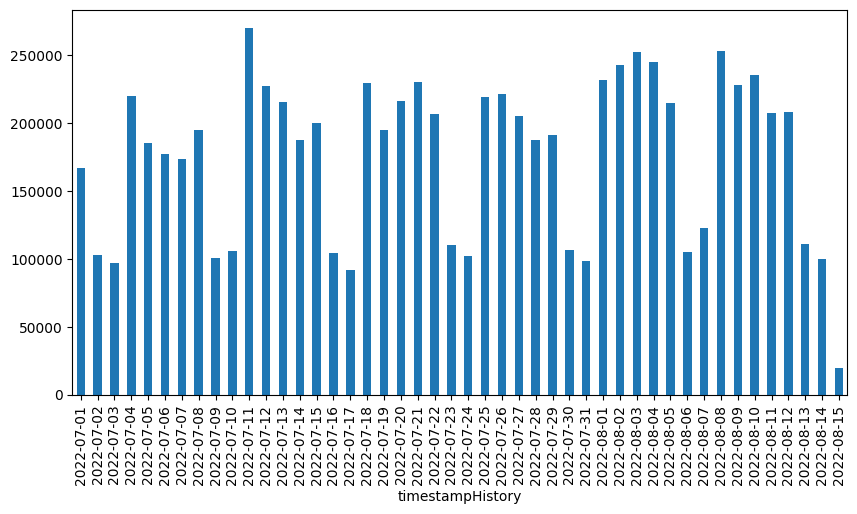

In [10]:
# plotando registros por dia
df["timestampHistory"].dt.date.value_counts().sort_index().plot(kind="bar", figsize=(10, 5))

# podemos observar uma sasonalidade com menor consumo nos finais de semana e uma quantidade estacionaria no "longo prazo"

In [11]:
# Engajamento por tipo de usuario (media e std)
(
    df
    .groupby("userType")
    [["numberOfClicksHistory", "timeOnPageHistory", "scrollPercentageHistory"]]
    .agg(["mean", "std"])
)


numberOfClicksHistory            timeOnPageHistory                 \
                            mean        std              mean            std   
userType                                                                       
Logged                 12.835719  31.105707      85826.121607  100280.124633   
Non-Logged             11.407094  41.862157      91201.351952  124036.865221   

           scrollPercentageHistory               
                              mean          std  
userType                                         
Logged                   55.572390  2030.842878  
Non-Logged               52.710144  1650.139221

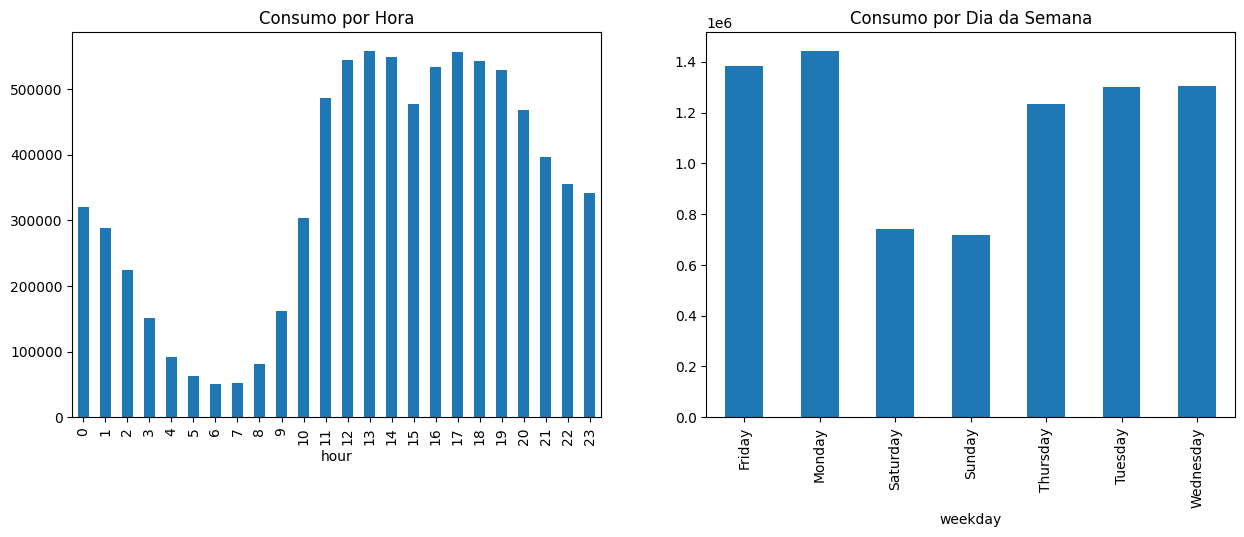

In [12]:
# Entendendo os padrões temporais
df["hour"] = df["timestampHistory"].dt.hour
df["weekday"] = df["timestampHistory"].dt.day_name()

f, ax = plt.subplots(1, 2, figsize=(15, 5))

df.groupby("hour")["historyId"].count().plot(kind="bar", ax=ax[0], title="Consumo por Hora")
df.groupby("weekday")["historyId"].count().plot(kind="bar", ax=ax[1], title="Consumo por Dia da Semana")

plt.show()

In [13]:
# noticias populares
popular_news = df["historyId"].value_counts().head(10)
print(popular_news)

df[df["historyId"].isin(popular_news.index)][["title", "body", "caption"]].drop_duplicates()


historyId
d2593c3d-2347-40d9-948c-b6065e8459a9    25075
f6b5d170-48b9-4f8e-88d4-c84b6668f3bd    22179
1f32787b-de2b-49be-8c20-ddaeae34cc22    19519
f0a78e58-ec7e-494c-9462-fbd6446a9a89    18361
6a83890a-d9e9-4f6b-a6c6-90d031785bbf    18101
855d20b7-53f2-4678-a10f-55402d085018    17105
4c63d7cd-4902-4ffb-9b94-578b1b2151f0    16758
1c27cf97-b20c-4e40-b1f1-288b721517b3    16428
bf257382-74fb-4392-ad6a-143240e39f81    16405
a36c98b5-f159-48f8-9f5a-1fc6ea9956c8    15885
Name: count, dtype: int64


,title,body,caption
22,Diretor da Caixa Econômica Federal é encontrad...,Sede da Caixa Econômica Federal em Brasília.\n...,Sérgio Ricardo Faustino Batista ocupava a dire...
42,Anestesista é preso em flagrante por estupro d...,Vídeo mostra momento em que anestesista estupr...,Giovanni Quintella Bezerra foi filmado por fun...
252,Filha é presa por golpe estimado em R$ 725 mil...,Filha é presa por golpe estimado em R$ 725 mil...,"\nSegundo as investigações, a filha contratou ..."
289,"Jô Soares, ícone do humor e da TV, morre em Sã...",Jô Soares morre aos 84 anos em São Paulo\nO ap...,Apresentador e humorista estava internado no H...
649,"Campeão mundial de jiu-jítsu, Leandro Lo é bal...","Campeão mundial de jiu-jítsu, Leandro Lo é bal...","Segundo o advogado da família, foi confirmada ..."
734,‘Tímido e discreto’: saiba quem era filho de C...,"Ronaldo Ramos Caiado Filho, filho do governado...",Ele é o segundo filho do governador e formado ...
803,Caso Bárbara: suspeito de envolvimento no assa...,Vídeo mostra a menina Bárbara Victória sendo a...,"Causa da morte é apurada. Menina de 10 anos, q..."
1092,Pizzaria recebe PIX falso e entrega refrigeran...,Golpe do Pix: empresa entrega pizza e refriger...,"Com ajuda de funcionários, dono do estabelecim..."
1179,Vídeos mostram diferentes ângulos do ataque ao...,Morte de Shinzo Abe: vídeo mostra momento do a...,Ex-primeiro-ministro foi atingido durante disc...
1255,Vídeo flagra homem atirando na cabeça de vizin...,Homem atira na cabeça de vizinho que limpava c...,"Crime ocorreu neste domingo (24), em Chapadão ..."


## Analise ChatGpt

In [39]:
!pip install pandas numpy scikit-learn nltk unidecode
!python -m nltk.downloader stopwords

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mauricioaraujo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
stopwords_pt = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mauricioaraujo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Clusters de Notícias

In [41]:
def limpar_texto_pt(texto):
    if pd.isnull(texto):
        return ""
    # Converte para minúsculas
    texto = texto.lower()
    # Remove acentuação
    texto = unidecode(texto)
    # Remove pontuação e caracteres especiais
    texto = re.sub(r'[^\w\s]', ' ', texto)
    # Remove dígitos
    texto = re.sub(r'\d+', '', texto)
    # Remove stopwords
    tokens = [word for word in texto.split() if word not in stopwords_pt]
    return " ".join(tokens)

df_itens = clean_items_data(df_itens_raw)

# Unir título + subtítulo + corpo (exemplo)
df_itens['text_full'] = (df_itens['title'].fillna('') + ' ' +
                         df_itens['caption'].fillna('') + ' ' +
                         df_itens['body'].fillna(''))

df_itens['text_clean'] = df_itens['text_full'].apply(limpar_texto_pt)


In [42]:
vectorizer = TfidfVectorizer(max_features=5000)  # limitar nº de features
X_tfidf = vectorizer.fit_transform(df_itens['text_clean'])
# X_tfidf é uma matriz esparsa (n_itens x 5000)

: 

In [ ]:
pca = PCA(n_components=50)  # ou 100, depende do caso
X_pca = pca.fit_transform(X_tfidf.toarray())  # Converter esparso p/ denso

In [ ]:
# Vamos tentar k em um range (ex. 2 a 10) e checar o "Elbow" e/ou "Silhouette"
inertias = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)
    labels = kmeans.labels_
    sil = silhouette_score(X_pca, labels)
    sil_scores.append(sil)

# Plot do Elbow
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, inertias, 'o-')
plt.title('Elbow')
plt.xlabel('k')
plt.ylabel('Inertia')

# Plot do Silhouette
plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, 'o-')
plt.title('Silhouette')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()


In [ ]:
# Supondo que decidimos k = 5
k_final = 5
kmeans_final = KMeans(n_clusters=k_final, random_state=42)
labels_final = kmeans_final.fit_predict(X_pca)

df_itens['cluster'] = labels_final

# Visualização 2D (após reduzir com PCA para 2 componentes)
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_final, cmap='viridis')
plt.colorbar()
plt.title("Clusters de Notícias - PCA 2D")
plt.show()

# Agora podemos analisar os clusters, por exemplo
df_itens.groupby('cluster')['historyId'].count()


### 1. Análise de Embeddings de Notícias

In [36]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE  # Adicionar t-SNE para melhor visualização
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode

# Garantir que temos os recursos em português
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    
    # Converter para minúsculo
    text = text.lower()
    
    # Remover acentos
    text = unidecode(text)
    
    # Remover URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remover emails
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remover pontuação mas manter hífen entre palavras
    text = re.sub(r'[^\w\s-]', ' ', text)
    
    # Remover números
    text = re.sub(r'\d+', '', text)
    
    # Tokenização específica para português
    tokens = word_tokenize(text, language='portuguese')
    
    # Remover stopwords em português
    stop_words = set(stopwords.words('portuguese'))
    # Adicionar stopwords específicas para notícias
    custom_stops = {'g1', 'globo', 'foto', 'veja', 'saiba', 'após', 'ano', 
                   'dia', 'dois', 'tres', 'sobre', 'agora', 'ainda', 'onde',
                   'sem', 'diz', 'ser', 'cada', 'mesmo', 'nesta', 'pode'}
    stop_words.update(custom_stops)
    
    words = [w for w in tokens if w not in stop_words]
    
    # Remover palavras muito curtas e hífens isolados
    words = [w for w in words if len(w) > 2 and w != '-']
    
    # Remover palavras duplicadas mantendo a ordem
    words = list(dict.fromkeys(words))
    
    return ' '.join(words)

# Primeiro aplicar o preprocessamento que criamos
def prepare_news_text(df):
    # Combinar título e corpo com pesos diferentes
    texts = df['title'] + ' ' + df['caption'] + ' ' + df['body']
    return [preprocess_text(text) for text in texts]


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mauricioaraujo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mauricioaraujo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mauricioaraujo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mauricioaraujo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [37]:
# Preparar textos
processed_texts = prepare_news_text(df_itens)

# Configurar TF-IDF com parâmetros específicos para português
vectorizer = TfidfVectorizer(
    max_features=1000,
    min_df=5,  # Ignorar termos que aparecem em menos de 5 documentos
    max_df=0.95,  # Ignorar termos que aparecem em mais de 95% dos documentos
    ngram_range=(1, 2),  # Incluir unigramas e bigramas
    stop_words='portuguese'
)

# Criar embeddings
news_embeddings = vectorizer.fit_transform(processed_texts)

# Primeiro reduzir com PCA para 50 dimensões
pca = PCA(n_components=50)
news_50d = pca.fit_transform(news_embeddings.toarray())

# Depois aplicar t-SNE para visualização final
tsne = TSNE(
    n_components=2,
    perplexity=30,
    n_iter=1000,
    random_state=42
)
news_2d = tsne.fit_transform(news_50d)


InvalidParameterError: The 'stop_words' parameter of TfidfVectorizer must be a str among {'english'}, an instance of 'list' or None. Got 'portuguese' instead.

In [ ]:
# Criar plot
plt.figure(figsize=(15, 10))

# Plotar todas as notícias com um colormap baseado na densidade
sns.kdeplot(
    x=news_2d[:, 0],
    y=news_2d[:, 1],
    cmap='Blues',
    fill=True,
    alpha=0.5
)

# Scatter plot das notícias
plt.scatter(
    news_2d[:, 0],
    news_2d[:, 1],
    alpha=0.1,
    s=10,
    color='darkblue'
)

# Destacar top notícias
top_10_ids = df['historyId'].value_counts().head(10).index
mask = df_itens['historyId'].isin(top_10_ids)
plt.scatter(
    news_2d[mask, 0],
    news_2d[mask, 1],
    color='red',
    alpha=0.8,
    s=100,
    label='Top 10 Notícias'
)

# Adicionar labels para as top notícias
for idx, (x, y) in enumerate(news_2d[mask]):
    title = df_itens.loc[mask, 'title'].iloc[idx]
    plt.annotate(
        text=title[:30] + '...',
        xy=(x, y),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        alpha=0.8,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    )

# Configurar o plot
plt.title('Distribuição de Notícias no Espaço Semântico', fontsize=14, pad=20)
plt.axis('off')
plt.legend()

# Adicionar uma barra de coloração para densidade
norm = plt.Normalize(0, 1)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
plt.colorbar(sm, label='Densidade de Notícias')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribuição de Notícias no Espaço Semântico')

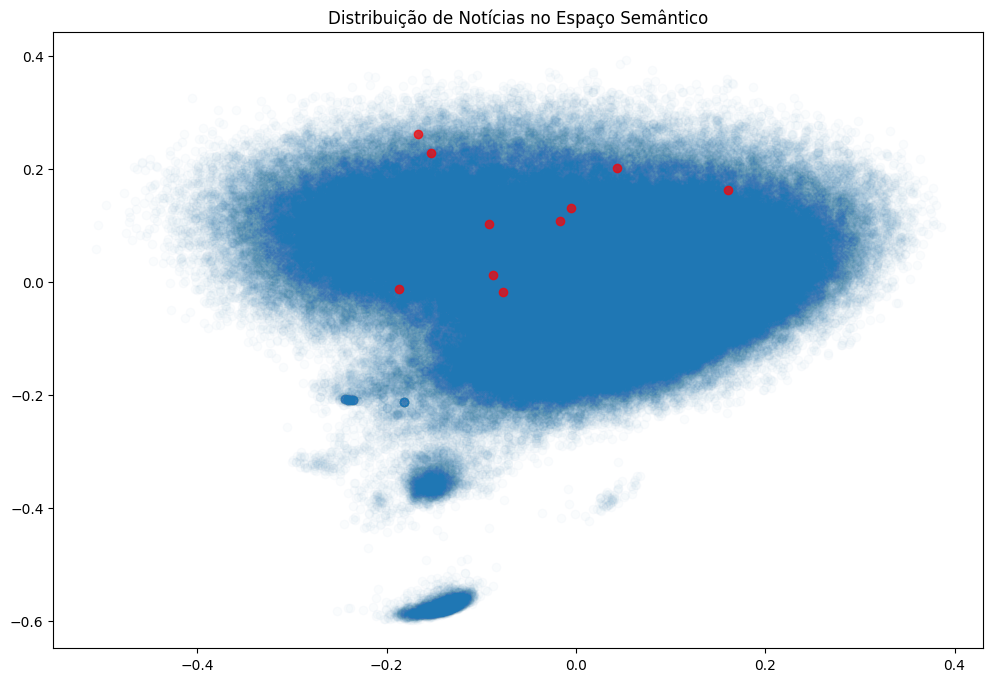

In [23]:
# Plotar com as notícias mais populares destacadas
plt.figure(figsize=(12, 8))
plt.scatter(news_2d[:, 0], news_2d[:, 1], alpha=0.02)
# Destacar top 10 notícias mais populares em vermelho
top_10_ids = df['historyId'].value_counts().head(10).index
mask = df_itens['historyId'].isin(top_10_ids)
plt.scatter(news_2d[mask, 0], news_2d[mask, 1], color='red', alpha=0.7)
plt.title('Distribuição de Notícias no Espaço Semântico')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mauricioaraujo/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mauricioaraujo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mauricioaraujo/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mauricioaraujo/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.



Palavras mais comuns:
prefeito: 4981
vereadores: 3899
eleitos: 3847
posse: 3817
lista: 3808
sexta: 3757
toma: 3747
novembro: 3743
tomam: 3738
assumem: 3731
cargo: 3729
podem: 3727
suplentes: 3723
ocupar: 3715
substituir: 3713
funcao: 3713
deixarem: 3712
outra: 3712
alem: 3695
votos: 1926


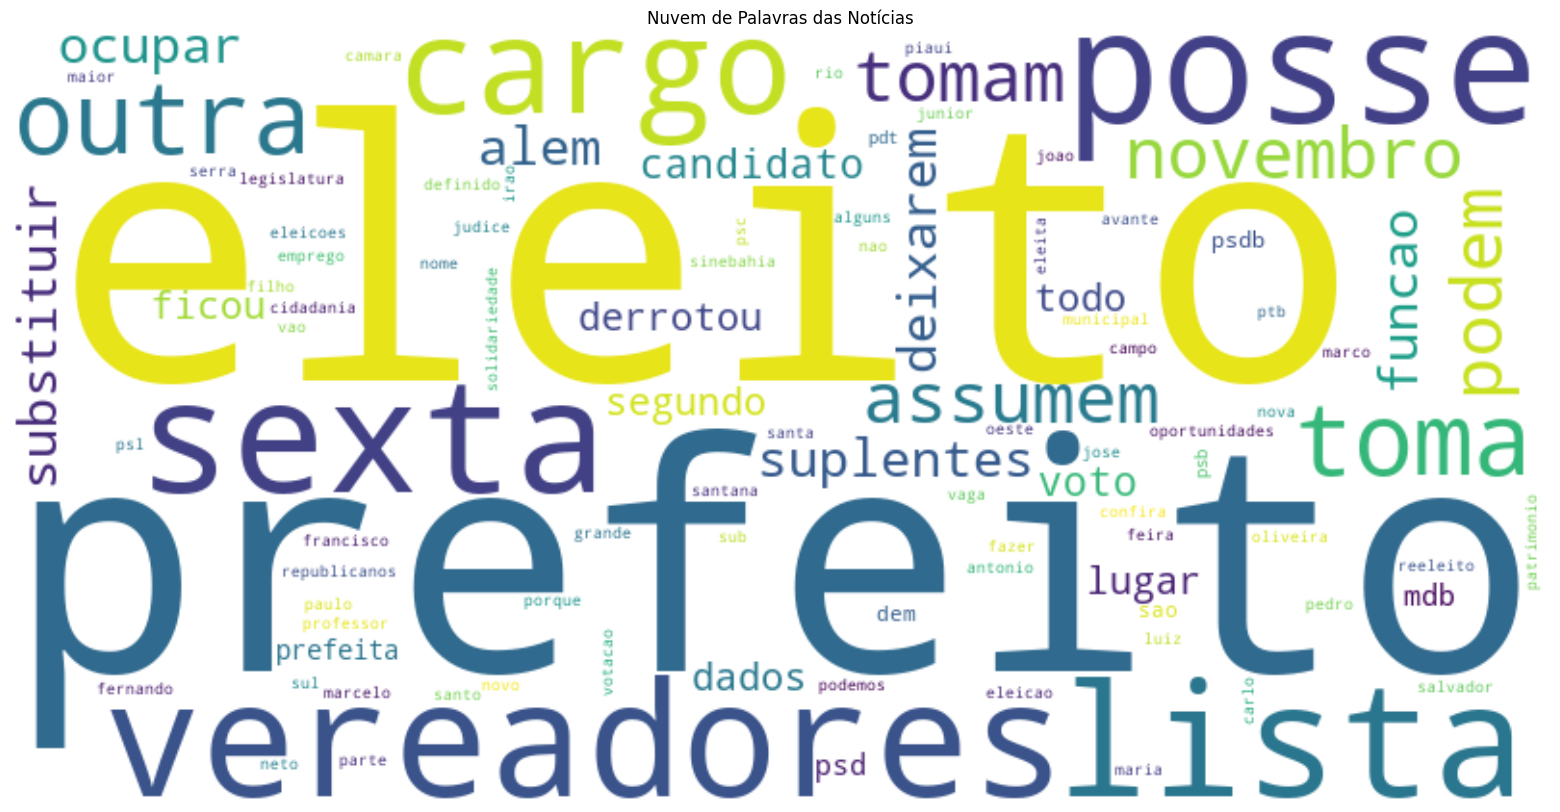

In [ ]:
lower_region_mask = news_2d[:, 1] < -0.3
news_in_islands = df_itens[lower_region_mask]

texts = news_in_islands['title'] + ' ' + news_in_islands['caption']
processed_texts = [preprocess_text(text) for text in texts]

words = [word for text in processed_texts for word in text.split()]
most_common = Counter(words).most_common(20)

print("\nPalavras mais comuns:")
for word, count in most_common:
    print(f"{word}: {count}")


from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, 
                     background_color='white',
                     collocations=False,
                     max_words=100).generate(' '.join(words))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras das Notícias')
plt.show()

In [28]:
most_common

[('de', 18286),
 ('.', 13768),
 ('vereadores', 11457),
 ('(', 11407),
 (')', 11407),
 (',', 10104),
 ('prefeito', 8303),
 ('o', 7622),
 (';', 7610),
 ('eleitos', 7575),
 ('posse', 7574),
 ('cargo', 7460),
 ('em', 5905),
 ('e', 5854),
 ('os', 5793),
 ('que', 5659),
 ('para', 4106),
 ('15', 3929),
 ('nesta', 3918),
 ('veja', 3915)]

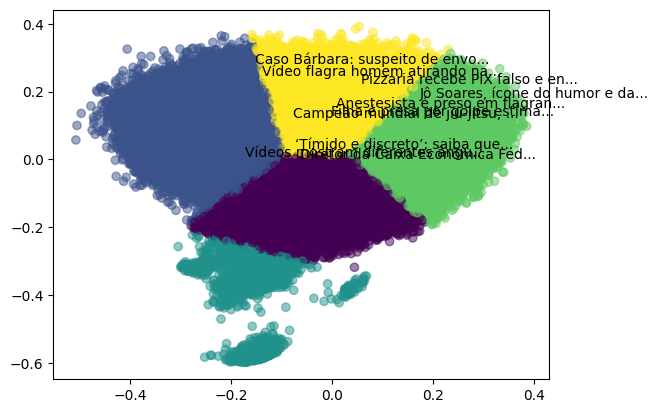

In [29]:
# Adicionar rótulos para as notícias mais populares
for idx, (x, y) in enumerate(news_2d[mask]):
    plt.annotate(df_itens.loc[mask, 'title'].iloc[idx][:30] + '...',
                (x, y), xytext=(5, 5), textcoords='offset points')

# Colorir por categorias ou tópicos
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=5).fit_predict(news_2d)
plt.scatter(news_2d[:, 0], news_2d[:, 1], c=clusters, alpha=0.5)

### 2. Mapa de Calor de Co-visualizações

In [17]:
# Criar matriz de co-visualização (quais notícias são lidas juntas)
def create_coview_matrix(df, top_n=100):
    # Pegar top N notícias mais populares
    top_news = df['historyId'].value_counts().head(top_n).index
    
    # Criar matriz de co-visualizações
    coviews = np.zeros((top_n, top_n))
    
    # Para cada usuário
    for user in df['userId'].unique():
        user_news = df[df['userId'] == user]['historyId']
        user_news = user_news[user_news.isin(top_news)]
        
        # Incrementar co-visualizações
        for i, news1 in enumerate(top_news):
            for j, news2 in enumerate(top_news):
                if news1 in user_news.values and news2 in user_news.values:
                    coviews[i, j] += 1
    
    return coviews, top_news

coviews, top_news = create_coview_matrix(df)
plt.figure(figsize=(15, 15))
sns.heatmap(coviews, xticklabels=False, yticklabels=False)
plt.title('Mapa de Calor de Co-visualizações')

KeyboardInterrupt: 

### 3. Análise de Sequência Temporal

In [ ]:
def plot_reading_sequence(user_id):
    # Pegar histórico do usuário ordenado por tempo
    user_history = df[df['userId'] == user_id].sort_values('timestampHistory')
    
    # Plotar linha do tempo
    plt.figure(figsize=(15, 5))
    plt.scatter(user_history['timestampHistory'], 
               range(len(user_history)),
               alpha=0.5)
    plt.ylabel('Sequência de Leitura')
    plt.xlabel('Tempo')
    plt.title(f'Sequência de Leitura do Usuário {user_id}')